In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN
from fcmeans import FCM
import seaborn as sns
import umap
import umap.plot
from collections import Counter
from sklearn.metrics import accuracy_score, silhouette_score, calinski_harabasz_score, davies_bouldin_score

## Извлечение датасета

In [2]:
#Заголовки данных согласно файлу с описанием glass.tag --Variant 11
data_headers = ["ID", "RI", "NA2O", "MGO", "AL2O3", "SIO2", "K2O", "CAO", "BAO", "FE2O3", "TYPE"]
all_data = pd.read_csv('C:/Учеба/Мага/1 семестр/Интеллектуальные системы и технологии/Практика 3-4/glass.data', names=data_headers)
all_data.head(10)
data_without_types = all_data.iloc[:, 1:-1].values

## Соответствие значений столбца TYPE и названий типов

In [3]:
types = all_data.iloc[:,10]
types_name = {1: "building_windows_float_processed",
            2 : "building_windows_non_float_processed",
            3 : "vehicle_windows_float_processed",
            5 : "containers",
            6 : "tableware",
            7 :"headlamps"}

## Обучение классификатора KMeans

In [4]:
kmeans_class = KMeans(n_clusters = 6,
                      init = 'k-means++',
                      max_iter = 200,
                      random_state = 151)
kmeans_labels = kmeans_class.fit_predict(data_without_types)

In [5]:
kmeans_labels

array([4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 1, 1, 4,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 4, 4, 1, 1, 1, 4,
       1, 4, 1, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 2, 2, 2, 0, 0,
       2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 0, 0, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1,
       1, 1, 1, 4, 1, 1, 1, 1, 4, 3, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0,
       4, 4, 4, 4, 5, 5, 0, 0, 5, 1, 3, 1, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

## Снижение размерности данных для рисования при помощи TSNE

In [6]:
data_tsne = TSNE(init='random', perplexity=12.0, random_state = 151).fit_transform(data_without_types)

c:\users\fisen\appdata\local\programs\python\python38\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


## Отображение исходных данных

[Text(0.5, 1.0, 'T-SNE projection of origin data')]

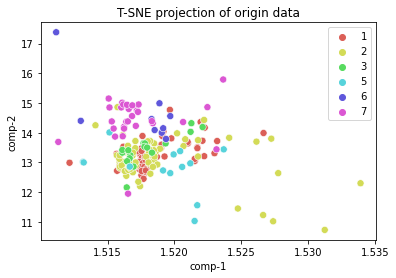

In [7]:
data_tsne_df = pd.DataFrame()
data_tsne_df["y"] = types
data_tsne_df["comp-1"] = data_without_types[:,0]
data_tsne_df["comp-2"] = data_without_types[:,1]
sns.scatterplot(x="comp-1",
                y="comp-2",
                hue=data_tsne_df.y.tolist(),
                palette=sns.color_palette("hls", len(Counter(data_tsne_df.y.tolist()))),
                data=data_tsne_df,
                s=50).set(title="T-SNE projection of origin data") 

## Данные с метками, присвоенными классификатором

[Text(0.5, 1.0, 'T-SNE projection of KMeans classifier')]

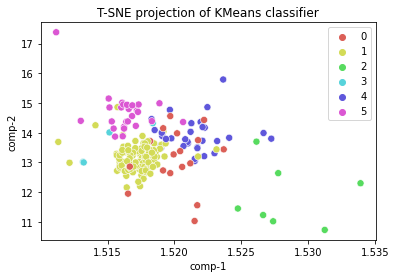

In [8]:
kmeans_tsne_df = data_tsne_df.copy(deep=True)
kmeans_tsne_df["y"] = kmeans_labels
sns.scatterplot(x="comp-1",
                y="comp-2",
                hue=kmeans_tsne_df.y.tolist(),
                palette=sns.color_palette("hls", len(Counter(kmeans_tsne_df.y.tolist()))),
                data=kmeans_tsne_df,
                s=50).set(title="T-SNE projection of KMeans classifier") 

### Изображение данных и центров кластеров

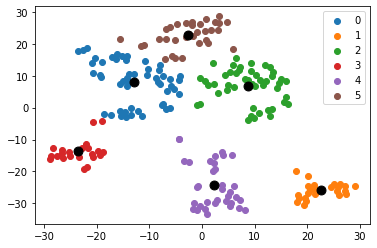

In [9]:
labels = kmeans_class.fit_predict(data_tsne)
#Getting unique labels
u_labels = np.unique(labels)
 
#plotting the results:
for i in u_labels:
    plt.scatter(data_tsne[labels == i , 0] , data_tsne[labels == i , 1] , label = i)
#Getting the Centroids
centroids = kmeans_class.cluster_centers_
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

### Оценка кластерного силуэта

In [10]:
silhouette_score(data_without_types, kmeans_labels)

0.4496528529808118

Средняя оценка силуэта составляет 0.4496528529808118, что достаточно низко. \
Нужно попробовать определить оптимальное количество кластеров для данного датасета

Справка: лучшее значение 1, а худшее -1. Значения около 0 указывают на перекрывающиеся кластеры. Отрицательные значения обычно указывают на то, что образец был назначен не тому кластеру, поскольку другой кластер более похож.

## Вычисление оптимального числа кластеров для датасета KMeans

In [13]:
fitted_kmeans = {}
labels_kmeans = {}
df_scores = []

for n_clusters in range(2,11):
    kmeans = KMeans(n_clusters=n_clusters)
    labels_clusters = kmeans.fit_predict(data_without_types)
    
    #Insert fitted model and calculated cluster labels in dictionaries,
    #for further reference.
    fitted_kmeans[n_clusters] = kmeans
    labels_kmeans[n_clusters] = labels_clusters
    
    #Calculate various scores, and save them for further reference.
    silhouette = silhouette_score(data_without_types, labels_clusters)
    ch = calinski_harabasz_score(data_without_types, labels_clusters)
    db = davies_bouldin_score(data_without_types, labels_clusters)
    tmp_scores = {"n_clusters": n_clusters,
                  "silhouette_score": silhouette,
                  "calinski_harabasz_score": ch,
                  "davies_bouldin_score": db,
                  }
    df_scores.append(tmp_scores)

df_scores = pd.DataFrame(df_scores)
df_scores.set_index("n_clusters", inplace=True)

Справка: \
calinski_harabasz_score - Оценка определяется как соотношение между дисперсией внутри кластера и дисперсией между кластерами. Оценка выше, когда элементы кластера хорошо разделены и находятся плотно друг к другу.

davies_bouldin_score - Минимальный балл равен нулю, более низкие значения указывают на лучшую кластеризацию. Оценка определяется как средний показатель сходства каждого кластера с наиболее похожим на него кластером, где сходство - это отношение расстояний внутри кластера к расстояниям между кластерами. Таким образом, кластеры, которые находятся дальше друг от друга и менее рассредоточены, дают лучший результат.

In [14]:
df_scores

,silhouette_score,calinski_harabasz_score,davies_bouldin_score
n_clusters,,,
2,0.560027,135.140030,1.068575
3,0.585605,134.472765,0.947922
4,0.588300,120.004945,0.692319
5,0.440461,121.851598,0.835741
6,0.451979,124.513294,0.964920
7,0.455062,124.009677,0.874123
8,0.438500,117.601645,0.881310
9,0.299511,113.972462,0.986066
10,0.304085,110.224097,0.903349


Как видно из данной таблицы, лучшее число кластеров для текущего набора данных - 4
Оценка кластерного силуэта - 0.588300

## Обучение классификатора DBSCAN

In [19]:
dbscan_class = DBSCAN(eps =1.5).fit(data_without_types)

In [20]:
dbscan_class.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0, -1, -1, -1,  1, -1, -1, -1, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1, -1,  1, -1,  1,
        1, -1, -1,  1,  0,  1,  0,  0,  0,  0, -1, -1,  1,  1, -1, -1, -1,
        0, -1, -1,  0,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2, -1,  2,  2,
        2,  2,  2, -1,  2,  2,  2,  2,  2,  2], dtype=int64)

## Данные с метками, присвоенными классификатором

[Text(0.5, 1.0, 'T-SNE projection of DBSCAN classifier')]

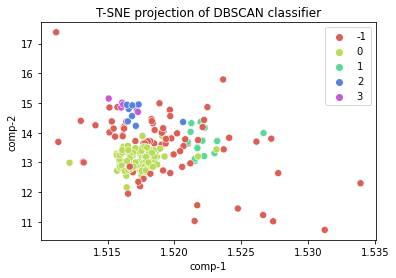

In [17]:
dbscan_tsne_df = data_tsne_df.copy(deep=True)
dbscan_tsne_df["y"] = dbscan_class.labels_
sns.scatterplot(x="comp-1",
                y="comp-2",
                hue=dbscan_tsne_df.y.tolist(),
                palette=sns.color_palette("hls", len(Counter(dbscan_tsne_df.y.tolist()))),
                data=dbscan_tsne_df,
                s=50).set(title="T-SNE projection of DBSCAN classifier") 

In [18]:
silhouette_score(data_without_types, dbscan_class.labels_)

0.2528561581643085

Для параметров по умолчанию классификатор находит 4 кластера, но очень много данных определяются как шум (кластер -1)

Оценка силуэта не высока, всего 0.2528561581643085

Кластеризация при установлении параметра eps = 1.5
Это максимальное расстояние между двумя образцами, при котором один считается соседним с другим.

[Text(0.5, 1.0, 'T-SNE projection of DBSCAN classifier')]

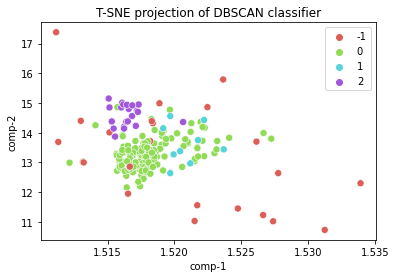

In [21]:
dbscan_tsne_df = data_tsne_df.copy(deep=True)
dbscan_tsne_df["y"] = dbscan_class.labels_
sns.scatterplot(x="comp-1",
                y="comp-2",
                hue=dbscan_tsne_df.y.tolist(),
                palette=sns.color_palette("hls", len(Counter(dbscan_tsne_df.y.tolist()))),
                data=dbscan_tsne_df,
                s=50).set(title="T-SNE projection of DBSCAN classifier") 

In [22]:
silhouette_score(data_without_types, dbscan_class.labels_)

0.5326334726895091

Наивысшая средняя оценка силуэта достигается при значении параметра eps=1.5 и составляет 0.5326334726895091, однако в таком случае мы получаем всего 3 кластера. -1 означает, что алгоритм посчитал точки за шум.

## Обучение классификатора FCM

In [23]:
fcm = FCM(n_clusters=6)
fcm.fit(data_without_types)

In [24]:
# outputs
fcm_centers = fcm.centers
fcm_labels = fcm.predict(data_without_types)

## Данные с метками, присвоенными классификатором

[Text(0.5, 1.0, 'T-SNE projection of FCM classifier')]

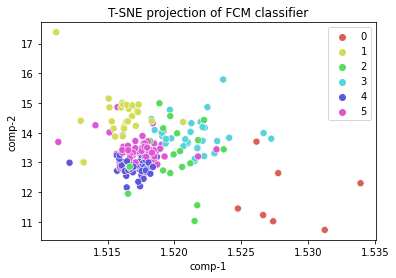

In [25]:
fcm_tsne_df = data_tsne_df.copy(deep=True)
fcm_tsne_df["y"] = fcm_labels
sns.scatterplot(x="comp-1",
                y="comp-2",
                hue=fcm_tsne_df.y.tolist(),
                palette=sns.color_palette("hls", len(Counter(fcm_tsne_df.y.tolist()))),
                data=fcm_tsne_df,
                s=50).set(title="T-SNE projection of FCM classifier") 

### Изображение данных и центров кластеров

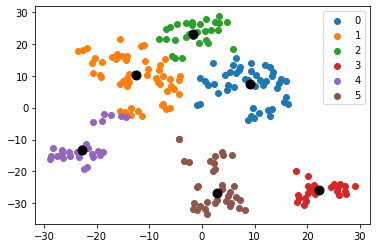

In [26]:
fcm = FCM(n_clusters=6)
fcm.fit(data_tsne)
labels = fcm.predict(data_tsne)
#Getting unique labels
u_labels = np.unique(labels)
 
#plotting the results:
for i in u_labels:
    plt.scatter(data_tsne[labels == i , 0] , data_tsne[labels == i , 1] , label = i)
#Getting the Centroids
centroids = fcm.centers
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

In [27]:
silhouette_score(data_without_types, fcm_labels)

0.24106532996879457

## Вычисление оптимального числа кластеров для датасета FCM

In [28]:
fitted_kmeans = {}
labels_kmeans = {}
df_scores = []

for n_clusters in range(2,11):
    fcm = FCM(n_clusters=n_clusters)
    fcm.fit(data_without_types)
    labels_clusters = fcm.predict(data_without_types)
    #Insert fitted model and calculated cluster labels in dictionaries,
    #for further reference.
    fitted_kmeans[n_clusters] = fcm
    labels_kmeans[n_clusters] = labels_clusters
    
    #Calculate various scores, and save them for further reference.
    silhouette = silhouette_score(data_without_types, labels_clusters)
    ch = calinski_harabasz_score(data_without_types, labels_clusters)
    db = davies_bouldin_score(data_without_types, labels_clusters)
    tmp_scores = {"n_clusters": n_clusters,
                  "silhouette_score": silhouette,
                  "calinski_harabasz_score": ch,
                  "davies_bouldin_score": db,
                  }
    df_scores.append(tmp_scores)

df_scores = pd.DataFrame(df_scores)
df_scores.set_index("n_clusters", inplace=True)

In [29]:
df_scores

,silhouette_score,calinski_harabasz_score,davies_bouldin_score
n_clusters,,,
2,0.554857,134.821030,1.075168
3,0.582205,134.101977,0.933813
4,0.386152,116.870289,1.065838
5,0.236018,95.811356,1.211923
6,0.241065,94.189516,1.222824
7,0.225789,81.841566,1.282760
8,0.239555,79.340522,1.329259
9,0.186723,67.391516,1.529884
10,0.190358,63.377781,1.473835


Из данной таблицы мы видем, что лучшее число кластеров для текущего набора данных - 3 При оценке кластерного силуэта 0.582205
Из оценки Дэвис-Боулдина можем увидеть, что средний показатель сходства кластеров довольно высоко

## Вывод
Согласно проведенным исследованиям, наиболее точный алгоритм кластеризации данных без учителя для данного набора - KMeans, с количеством кластеров = 4. При таком параметре можно достичь оценки кластерного силуэта 0.588300.

Для такого же числа кластеров алгоритм FCM имеет лучшую оценка, чем DBSCAN: 0.386152 против 0.2528561581643085

При этом для FCM более оптимальным считается 3 кластера для текущего набора данных

Такие результаты класстеризации (на 2 класса меньше, чем в исходных данных) достигается за счет распределения объектов по следующим категориям:

1: "building_windows_float_processed" - 70 экземпляров

2 : "building_windows_non_float_processed" - 76 экземпляров

3 : "vehicle_windows_float_processed" - 17 экземпляров

5 : "containers" - 13 экземпляров

6 : "tableware" - 9 экземпляров

7 :"headlamps" - 29 экземпляров

Как видно 5 и 6 классы в меньшинстве, особенно в сравнении с 1 и 2 классами, из-за чего кластеризация без учителя не очень точна.